In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


In [2]:
df = []
for filename in os.listdir():
    if filename.endswith(".csv"):
        print('Collecting... ', filename)
        df.append(pd.read_csv(filename))

print(f"Done Collecting {len(df)} files")

Collecting...  olist_customers_dataset.csv
Collecting...  olist_geolocation_dataset.csv
Collecting...  olist_orders_dataset.csv
Collecting...  olist_order_items_dataset.csv
Collecting...  olist_order_payments_dataset.csv
Collecting...  olist_order_reviews_dataset.csv
Collecting...  olist_products_dataset.csv
Collecting...  olist_sellers_dataset.csv
Collecting...  product_category_name_translation.csv
Done Collecting 9 files


In [3]:
def get_df_info(num, dataset):
    df_info = []
    for col in dataset.columns: 
        filename = num
        column = col
        missing_count = dataset[col].isnull().sum()
        duplicate_count = dataset.duplicated().sum()
        data_type = dataset[col].dtype
        df_info.append([filename, col, missing_count, duplicate_count, data_type])

    return df_info

all_df_info = pd.DataFrame()
for i, dataframe in enumerate(df):
    temp_df = get_df_info(i, dataframe)
    temp_df = pd.DataFrame(temp_df, columns=['dataframe','feature','missing','duplicate','type'])
    all_df_info = pd.concat([all_df_info, temp_df])

all_df_info

,dataframe,feature,missing,duplicate,type
0,0,customer_id,0,0,object
1,0,customer_unique_id,0,0,object
2,0,customer_zip_code_prefix,0,0,int64
3,0,customer_city,0,0,object
4,0,customer_state,0,0,object
0,1,geolocation_zip_code_prefix,0,261831,int64
1,1,geolocation_lat,0,261831,float64
2,1,geolocation_lng,0,261831,float64
3,1,geolocation_city,0,261831,object
4,1,geolocation_state,0,261831,object


In [4]:
df[6] = df[6].merge(df[8], on='product_category_name') \
    .drop(['product_category_name'],axis=1) \
    .rename(columns={'product_category_name_english':'product_category_name'})

for i in list(df[6].loc[df[6]['product_category_name'].isna()].index):
  if df[6]['product_category_name'].iloc[i] == 'pc_gamer':
    df[6]['product_category_name'].iloc[i] = 'pc_gaming'
  elif df[6]['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos':
    df[6]['product_category_name'].iloc[i] = 'portable_kitchen_and_food_preparers'
  else:
    df[6]['product_category_name'].iloc[i] = 'other_products'

del(df[8])
df[6]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [5]:
for dataframe in  df:
    for col in dataframe.columns:
        if col.endswith('date') or col.endswith('timestamp'):
            print(f'converting {col}...')
            dataframe[col] = pd.to_datetime(dataframe[col])

converting order_purchase_timestamp...
converting order_delivered_carrier_date...
converting order_delivered_customer_date...
converting order_estimated_delivery_date...
converting shipping_limit_date...
converting review_creation_date...
converting review_answer_timestamp...


In [6]:
order_df = pd.merge(
    left=df[2][['order_id','order_purchase_timestamp']],
    right=df[3][['order_id','order_item_id','product_id']],
    on='order_id',
    how='left'
)
order_df = pd.merge(
    left=order_df,
    right=df[6][['product_id','product_category_name']],
    on='product_id',
    how='left'
)

order_df

,order_id,order_purchase_timestamp,order_item_id,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,stationery
...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,baby
113421,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories


What are the most popular product categories? Are there seasonal trends in purchases?

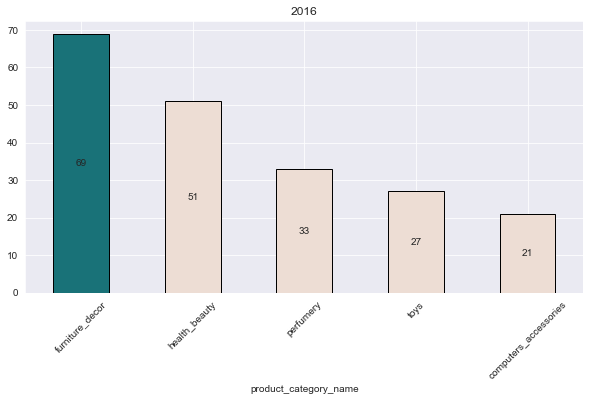

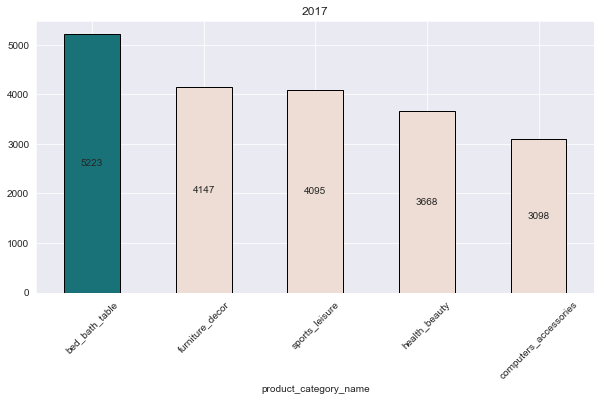

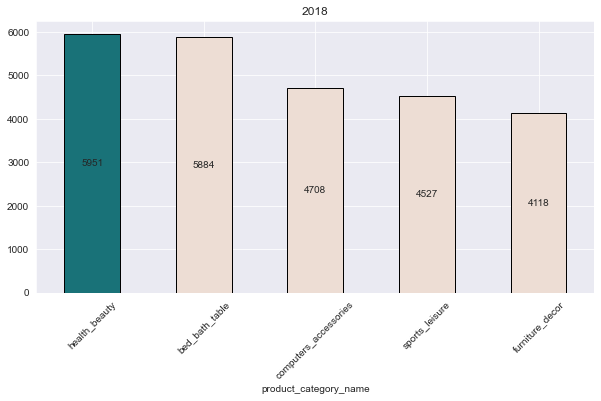

In [7]:
colors = ["#197278", "#edddd4", "#edddd4", "#edddd4", "#edddd4", "#edddd4", "#edddd4"]

#per year
order_years = np.sort(order_df['order_purchase_timestamp'].dt.year.unique())

for year in order_years:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(year)
    use_df = order_df[order_df['order_purchase_timestamp'].dt.year == year]
    largest_item = use_df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head()
    largest_item.plot(kind='bar', color=colors, edgecolor='black', ax=ax)
    ax.bar_label(ax.containers[0], label_type='center')
    plt.xticks(rotation=45)
    plt.plot()

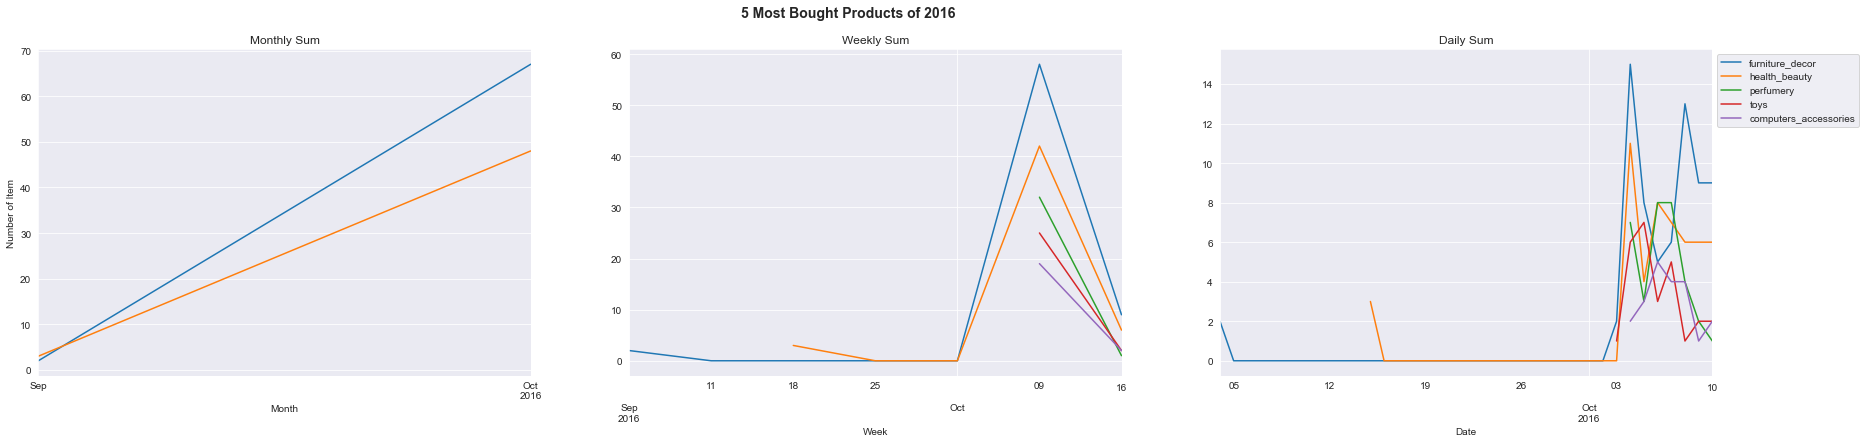

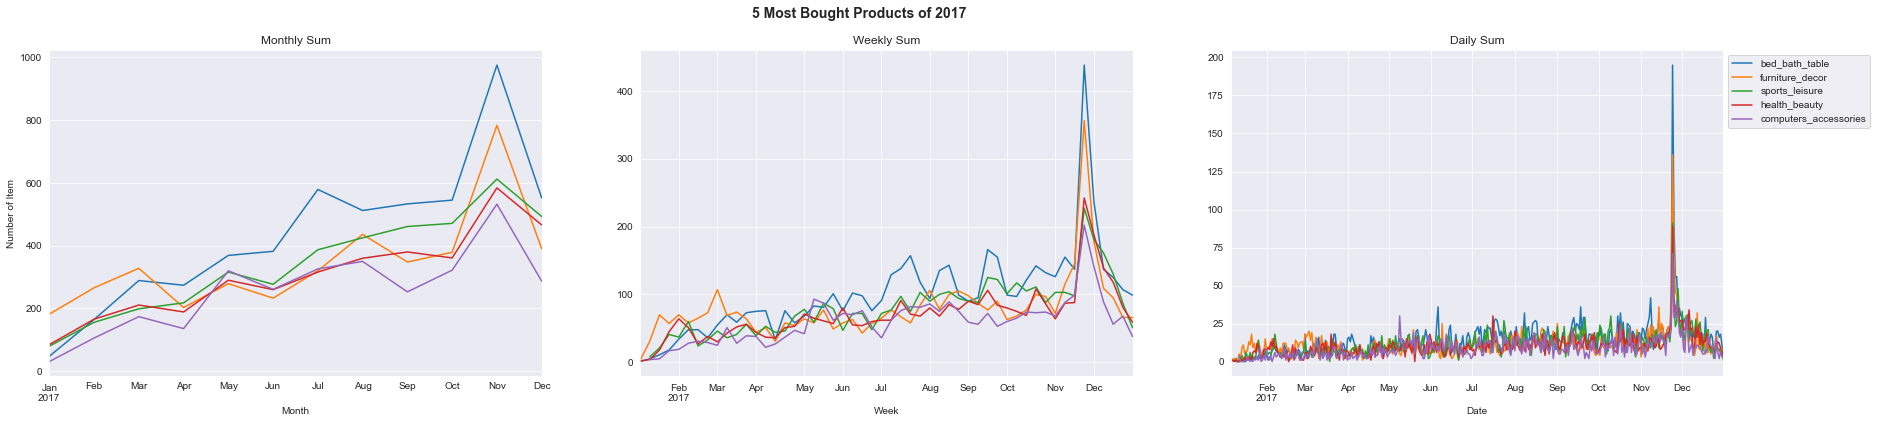

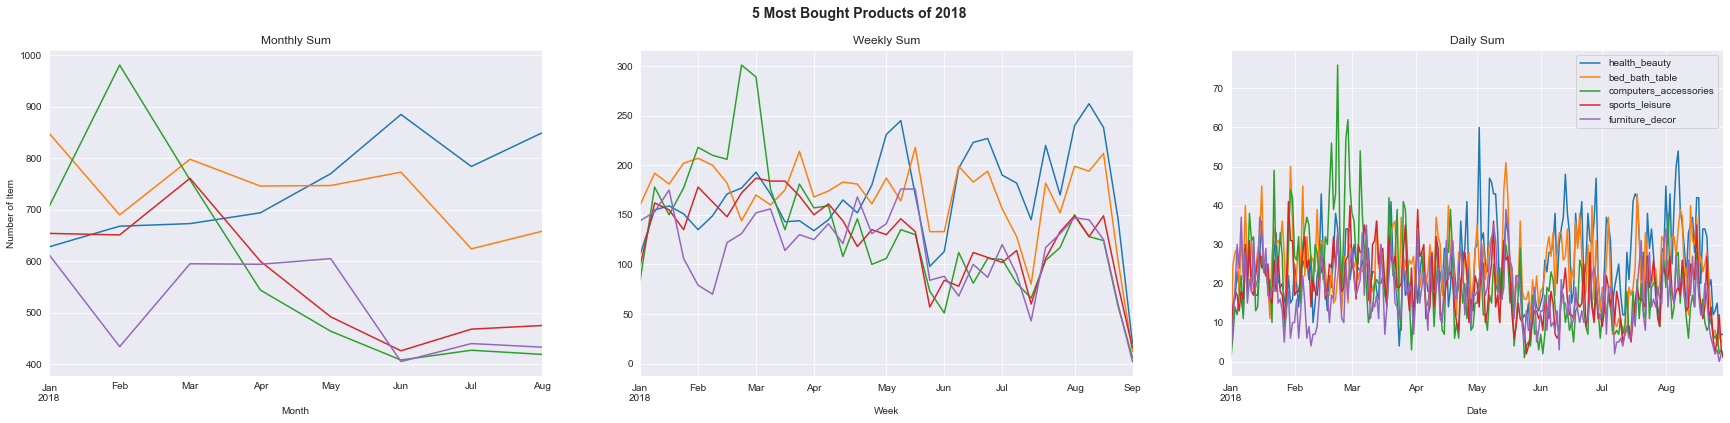

In [8]:
for year in order_years:
    fig, ax = plt.subplots(1,3, figsize=(30,6))
    plt.title(year)
    
    use_df = order_df[order_df['order_purchase_timestamp'].dt.year == year] \
        .sort_values(by='order_purchase_timestamp') \
        .reset_index()

    largest_item = use_df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head()
    
    ax[0].set_title('Monthly Sum')
    for category in largest_item.index:
        plot_df = use_df[use_df['product_category_name']==category].sort_values(by='order_purchase_timestamp') \
            .resample('M', on='order_purchase_timestamp')['order_id'].count().plot(label=category, ax=ax[0])
        ax[0].set_xlabel('Month')
        ax[0].set_ylabel('Number of Item')
    
    ax[1].set_title('Weekly Sum')
    for category in largest_item.index:
        plot_df = use_df[use_df['product_category_name']==category].sort_values(by='order_purchase_timestamp') \
            .resample('W', on='order_purchase_timestamp')['order_id'].count().plot(label=category, ax=ax[1])
        ax[1].set_xlabel('Week')
        ax[1].set_label('Numbes of Item')

    ax[2].set_title('Daily Sum')
    for category in largest_item.index:
        plot_df = use_df[use_df['product_category_name']==category].sort_values(by='order_purchase_timestamp') \
            .resample('D', on='order_purchase_timestamp')['order_id'].count().plot(label=category, ax=ax[2])
        ax[2].set_xlabel('Date')
        ax[2].set_label('Number of Item')

    plt.legend(bbox_to_anchor=(1,1))
    plt.suptitle(f'5 Most Bought Products of {year}', weight='bold', size=14)
    plt.show()

Start Date : 2016-09-04 21:15:19
End Date   : 2018-10-17 17:30:18


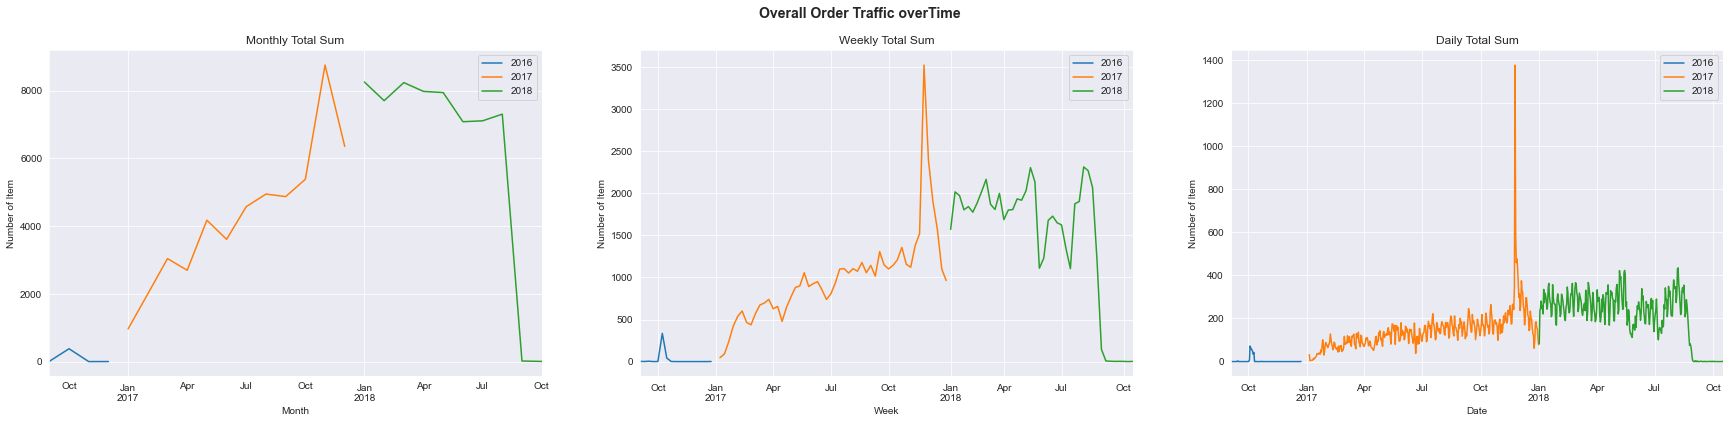

In [9]:
print('Start Date :', order_df['order_purchase_timestamp'].min())
print('End Date   :', order_df['order_purchase_timestamp'].max())

fig, ax = plt.subplots(1,3, figsize=(30,6))
for year in order_years:
    use_df = order_df[order_df['order_purchase_timestamp'].dt.year==year] \
        .sort_values(by='order_purchase_timestamp') \
        .reset_index()
    
    use_df.resample('M', on='order_purchase_timestamp')['order_id'].count().plot(ax=ax[0], label=year)
    ax[0].set_title('Monthly Total Sum')
    ax[0].set_xlabel('Month')
    ax[0].set_ylabel('Number of Item')
    ax[0].legend()

    use_df.resample('W', on='order_purchase_timestamp')['order_id'].count().plot(ax=ax[1], label=year)
    ax[1].set_title('Weekly Total Sum')
    ax[1].set_xlabel('Week')
    ax[1].set_ylabel('Number of Item')
    ax[1].legend()

    use_df.resample('D', on='order_purchase_timestamp')['order_id'].count().plot(ax=ax[2], label=year)
    ax[2].set_title('Daily Total Sum')
    ax[2].set_xlabel('Date')
    ax[2].set_ylabel('Number of Item')
    ax[2].legend()


plt.suptitle('Overall Order Traffic overTime',weight='bold', size=14)
plt.show()


In [10]:
order_time_df = df[2][['order_id','order_purchase_timestamp']]

order_time_df.insert(2,'hour_order', order_time_df['order_purchase_timestamp'].apply(lambda x: x.hour)) #insert kolom 'hour_order' di index ke-3

hours_bins = [-0.1, 6, 12, 18, 23] #Membagi kolom hour_order ke dalam beberapa bagian
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
order_time_df.insert(3,'daytime_order', (pd.cut(order_time_df['hour_order'], hours_bins, labels=hours_labels))) #insert kolom 'daytime_order' di index ke-4

order_time_df.insert(4,'day_order', order_time_df['order_purchase_timestamp'].dt.strftime('%A')) #insert kolom 'day_order' di index ke-5
order_time_df.insert(5,'date_order', order_time_df['order_purchase_timestamp'].dt.strftime('%d')) #insert kolom 'date_order' di index ke-6
order_time_df.insert(6,'month_order', order_time_df['order_purchase_timestamp'].dt.strftime('%B')) #insert kolom 'month_order' di index ke-7

order_time_df.sample(10)

,order_id,order_purchase_timestamp,hour_order,daytime_order,day_order,date_order,month_order
13992,bbff6155059675574b04a09d10cbb76c,2018-05-28 22:31:13,22,Night,Monday,28,May
67083,e7938bd84b6b7a281bce96a5bc2340f8,2018-04-23 23:06:02,23,Night,Monday,23,April
11074,870e6f0cd3ddbb87daf15ccd2926b142,2018-08-21 15:37:50,15,Afternoon,Tuesday,21,August
23966,e0017093576ff7e25777c2d023eb1cd9,2018-06-26 14:57:28,14,Afternoon,Tuesday,26,June
39086,0972cd8199019b252faf977c4d3da6ea,2017-07-11 18:31:06,18,Afternoon,Tuesday,11,July
13199,a698eb7ffd8072c3664a4950b259ff0b,2017-12-06 12:16:43,12,Morning,Wednesday,06,December
90104,b8f3f5cc5ad4103e17b5d0bd4266d69d,2017-05-06 17:25:10,17,Afternoon,Saturday,06,May
14744,a84a154c67bdaf74f92aa059d7f84025,2018-07-18 09:53:17,9,Morning,Wednesday,18,July
49358,e85ffcc0e310087de07b84dbd43fe3c1,2017-05-02 15:09:23,15,Afternoon,Tuesday,02,May
44834,43d782238f80b75ff6b62c0e535ce34a,2017-05-30 15:29:19,15,Afternoon,Tuesday,30,May


In [11]:
count_hour_order = order_time_df.groupby('hour_order').order_id.nunique().reset_index()
count_daytime_order = order_time_df.groupby('daytime_order').order_id.nunique().reset_index()

def set_custom_palette(series, max_color = '#197278', other_color = '#edddd4'):
    max_value = series.max()
    pal = []

    for item in series:
        if item == max_value:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

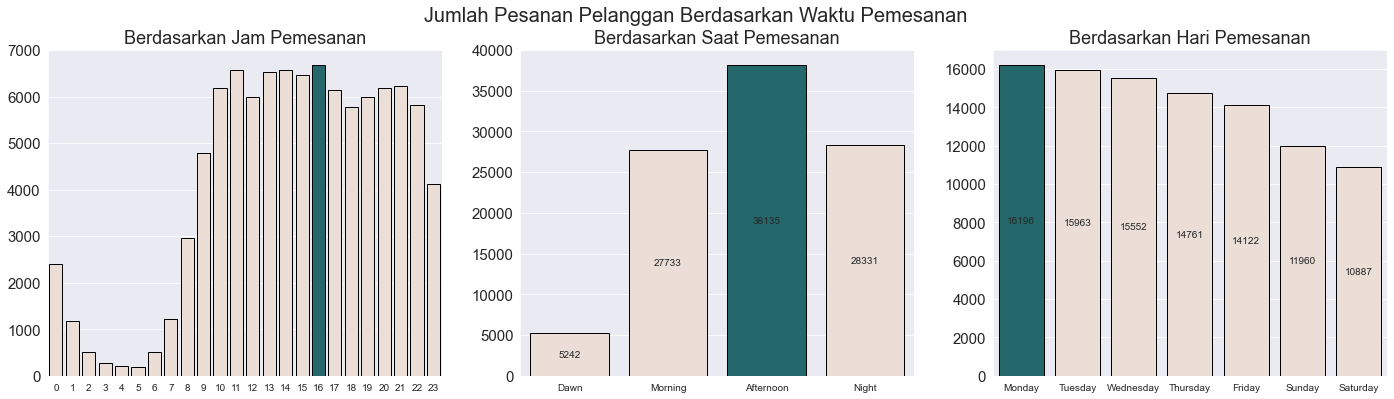

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

sns.barplot(x="hour_order",
            y="order_id",
            data= count_hour_order,
            palette= set_custom_palette(count_hour_order.order_id),
            edgecolor='black',
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Jam Pemesanan", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="daytime_order",
            y="order_id",
            data= order_time_df.groupby('daytime_order').order_id.nunique().reset_index(),
            palette= set_custom_palette(count_daytime_order.order_id),
            edgecolor='black',
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Saat Pemesanan", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)
ax[1].bar_label(ax[1].containers[0], label_type='center')

sns.barplot(x="day_order",
            y="order_id",
            data= order_time_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id',ascending=False),
            palette=colors,
            edgecolor='black',
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Hari Pemesanan", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)
ax[2].bar_label(ax[2].containers[0], label_type='center')

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu Pemesanan", fontsize=20)
plt.show()

What are the most popular seller (by number of order and rating)?

In [13]:
review_df = pd.merge(
    left=df[7]['seller_id'],
    right=df[3][['seller_id','order_id']],
    on=['seller_id'],
    how='left'
)

review_df = pd.merge(
    left=review_df,
    right=df[5][['order_id','review_id','review_score']],
    on='order_id',
    how='left'
)

review_df = review_df.dropna(axis=0)
review_df

,seller_id,order_id,review_id,review_score
0,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,88980a9c50a6909fa1fe35ddab8fa1e2,5.0
1,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,b9b791819c5c1a5c6a4ffc7881f97fb5,1.0
2,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,cc77a6d63753c1d7b88b7c64630b97b9,3.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,27a894ac7d70600fd49d2ac3b910e65d,5.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,265e6d99461ed7db35a7f48a00df7e6c,5.0
...,...,...,...,...
113309,e603cf3fec55f8697c9059638d6c8eb5,7aa50aad959e4345b45b9732bc346a6e,8f4cce4ac9dfa9aa01f87fbfa96feff9,5.0
113310,e603cf3fec55f8697c9059638d6c8eb5,aae373a2cc64ed2d1f262aa56e70b7e8,18c04c268a75465115071bbb8194e45f,4.0
113311,e603cf3fec55f8697c9059638d6c8eb5,bc34d5b185152cb88b9f5db391dcd1cb,7000c326aa8b27f36db72af0ef288eef,4.0
113312,e603cf3fec55f8697c9059638d6c8eb5,d1edb80f6670902ebbb11765b96873da,edf0a61fdccf258654cb87ba64643d27,2.0


In [14]:
colors

['#197278', '#edddd4', '#edddd4', '#edddd4', '#edddd4', '#edddd4', '#edddd4']

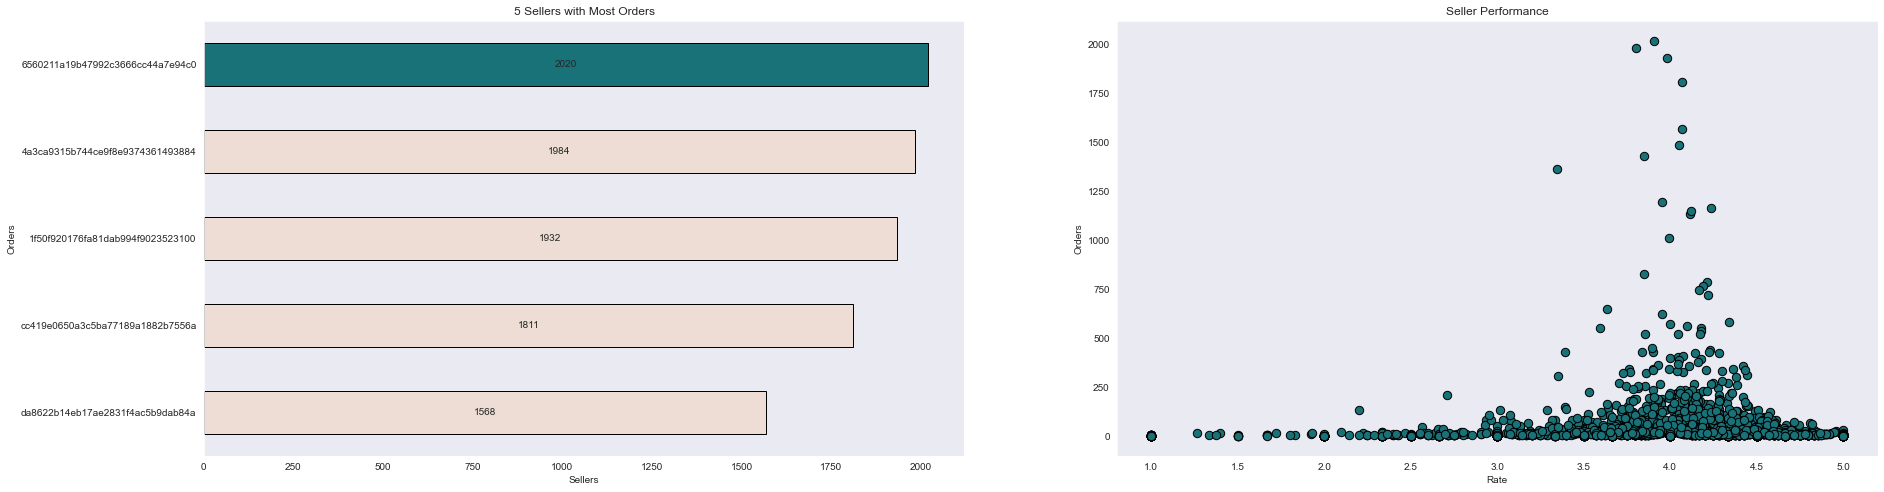

In [15]:
order_count = review_df.groupby('seller_id')['order_id'].count()
overall_rating = review_df.groupby('seller_id')['review_score'].mean()

colorsh = ['#edddd4', '#edddd4', '#edddd4', '#edddd4', '#197278']
seller_rating = pd.concat([overall_rating, order_count], axis=1)

fig, ax = plt.subplots(1,2, figsize=(30, 8))

seller_rating['order_id'].sort_values(ascending=True).tail().plot(kind='barh', color=colorsh, edgecolor='black', ax=ax[0])
ax[0].set_title('5 Sellers with Most Orders')
ax[0].set_xlabel('Sellers')
ax[0].set_ylabel('Orders')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].grid()

ax[1].scatter(x=seller_rating['review_score'], y=seller_rating['order_id'], color=colors[0], edgecolors='black', s=70)
ax[1].set_title('Seller Performance')
ax[1].set_xlabel('Rate')
ax[1].set_ylabel('Orders')
ax[1].grid()

plt.show()

Customer behaviour

In [16]:
customer_df = pd.merge(
    left=df[2][['customer_id','order_id']],
    right=df[3][['order_id','order_item_id','product_id','price']],
    on='order_id',
    how='left'
)

customer_df = customer_df.dropna(axis=0)
customer_df

,customer_id,order_id,order_item_id,product_id,price
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,159.90
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...
113420,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
113421,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,1.0,b80910977a37536adeddd63663f916ad,205.99
113422,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
113423,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


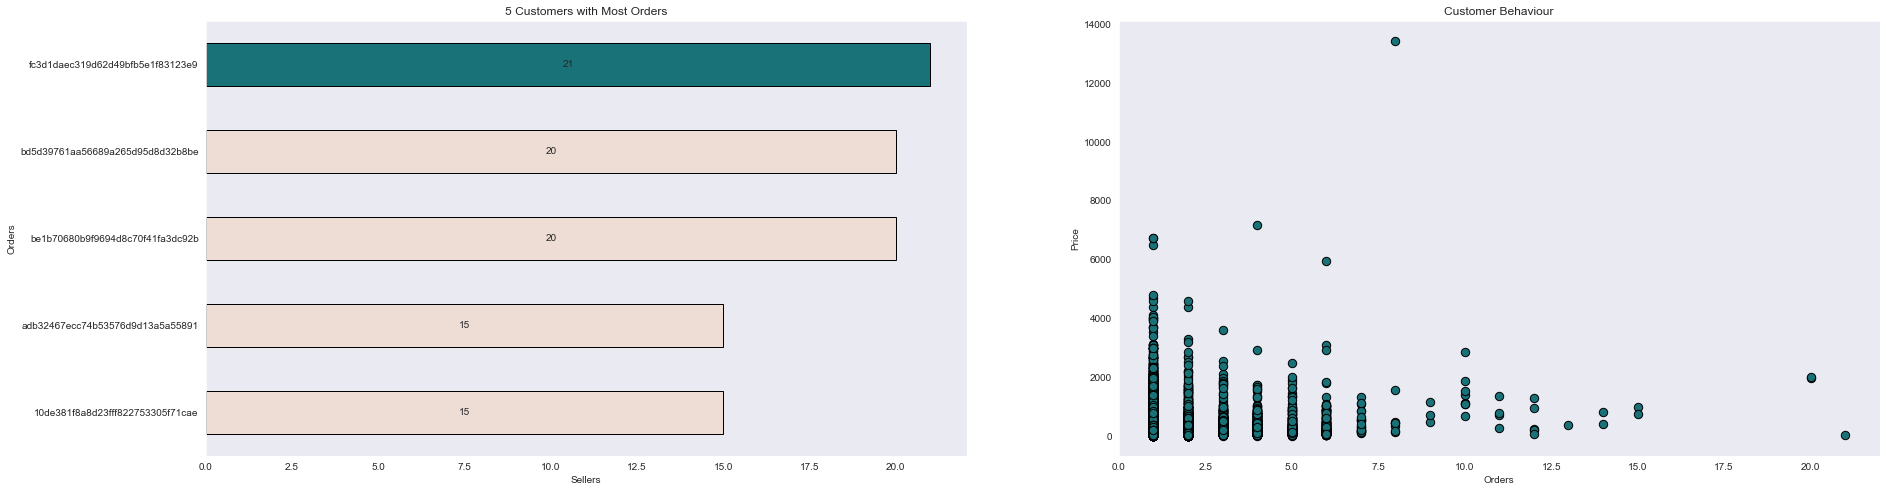

In [17]:
total_price = customer_df.groupby('customer_id')['price'].sum()
order_count = customer_df.groupby('customer_id')['order_id'].count()

customer_behaviour = pd.concat([total_price, order_count], axis=1)

fig, ax = plt.subplots(1,2, figsize=(30, 8))

customer_behaviour['order_id'].sort_values(ascending=True).tail().plot(kind='barh', color=colorsh, edgecolor='black', ax=ax[0])
ax[0].set_title('5 Customers with Most Orders')
ax[0].set_xlabel('Sellers')
ax[0].set_ylabel('Orders')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].grid()

ax[1].scatter(x=customer_behaviour['order_id'], y=customer_behaviour['price'], color=colors[0], s=70, edgecolors='black')
ax[1].set_title('Customer Behaviour')
ax[1].set_xlabel('Orders')
ax[1].set_ylabel('Price')
ax[1].grid()

plt.show()

What are average delivery times by the factor of region?

In [18]:
delivery_df = pd.merge(
    left=df[2][['order_id','customer_id','order_approved_at','order_estimated_delivery_date','order_delivered_customer_date']],
    right=df[4][['order_id','payment_type']],
    on='order_id',
    how='left'
)

delivery_df = pd.merge(
    left=delivery_df,
    right=df[3][['order_id','seller_id']],
    on='order_id',
    how='left'
)

delivery_df = pd.merge(
    left=delivery_df,
    right=df[7][['seller_id','seller_city','seller_state']],
    on='seller_id',
    how='left'
)

delivery_df = pd.merge(
    left=delivery_df,
    right=df[0][['customer_id','customer_city','customer_state']],
    on='customer_id',
    how='left'
)

delivery_df = delivery_df.dropna(subset=['payment_type','seller_id','seller_city','seller_state','customer_city','customer_state'], axis=0)
delivery_df = delivery_df.drop_duplicates(subset='order_id').reset_index(drop=True)

delivery_df

,order_id,customer_id,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,payment_type,seller_id,seller_city,seller_state,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-18,2017-10-10 21:25:13,credit_card,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-08-13,2018-08-07 15:27:45,boleto,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,SP,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-09-04,2018-08-17 18:06:29,credit_card,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-12-15,2017-12-02 00:28:42,credit_card,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-26,2018-02-16 18:17:02,credit_card,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
98660,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-28,2017-03-17 15:08:01,credit_card,e24fc9fcd865784fb25705606fe3dfe7,braganca paulista,SP,sao jose dos campos,SP
98661,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,2018-03-02,2018-02-28 17:37:56,credit_card,1f9ab4708f3056ede07124aad39a2554,tupa,SP,praia grande,SP
98662,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,2017-09-27,2017-09-21 11:24:17,credit_card,d50d79cb34e38265a8649c383dcffd48,sao paulo,SP,nova vicosa,BA
98663,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,2018-02-15,2018-01-25 23:32:54,credit_card,a1043bafd471dff536d0c462352beb48,ilicinea,MG,japuiba,RJ


In [19]:
delivered_df = delivery_df[(delivery_df['order_delivered_customer_date'].isna()==False) & (delivery_df['order_approved_at'].isna()==False)].reset_index(drop=True)
delivered_df['order_delivered_customer_date'] = pd.to_datetime(delivered_df['order_delivered_customer_date'])
delivery_df['order_estimated_delivery_date'] = pd.to_datetime(delivery_df['order_estimated_delivery_date'])

delivered_df['delivery_time'] = delivered_df['order_estimated_delivery_date'] - delivered_df['order_delivered_customer_date']

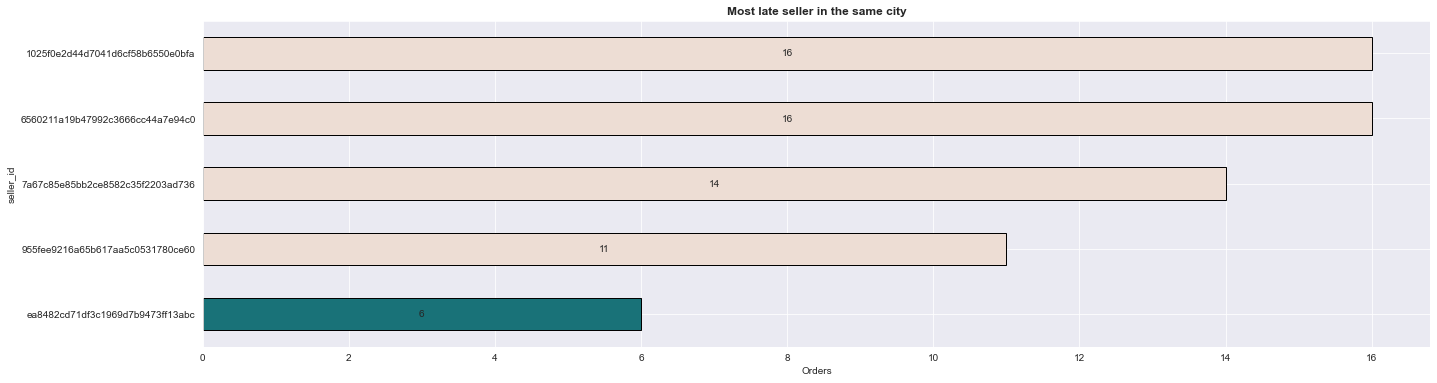

In [20]:
late_delivery = delivered_df[delivered_df['delivery_time']<pd.to_timedelta(0)]

late_same_city = late_delivery[late_delivery['seller_city']==late_delivery['customer_city']]
total_late_same_city = late_same_city.groupby('seller_id')['order_id'].count().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(30,6))

plt.title('Most late seller in the same city', weight='bold', size=12)
total_late_same_city.tail().plot(kind='barh', color=colors, edgecolor='black', figsize=(22,6))
ax.bar_label(ax.containers[0], label_type='center')
plt.xlabel('Orders')
plt.ylabel('seller_id')

plt.show()

Deeper : R-F-M

Recency

In [21]:
new_df = df[4].merge(df[3], on='order_id') \
    .merge(df[2], on='order_id') \
    .merge(df[0], on='customer_id')

rfm_df = new_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = new_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


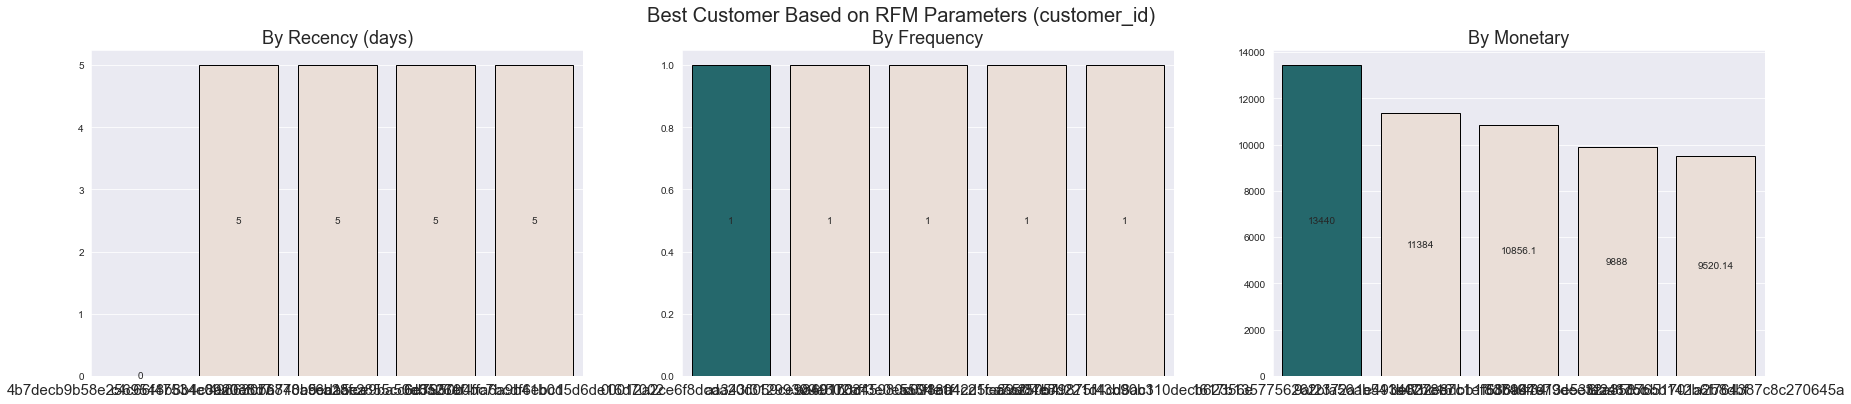

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, edgecolor='black', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].bar_label(ax[0].containers[0], label_type='center')
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, edgecolor='black', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].bar_label(ax[1].containers[0], label_type='center')
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, edgecolor='black', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].bar_label(ax[2].containers[0], label_type='center')
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()